In [1]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt

In [2]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [3]:
# parameters
na = 20  # number of Fock states
nb = 5 
T = 4  # time of evolution
omega = jnp.pi/T  # detuning2=1
eps = -4
Kb = 10

In [4]:
# operators
a, b = dq.destroy(na, nb)

g2 = 1 # coupling strength

H = g2 * dq.dag(a) @ dq.dag(a) @ b  + g2 * a @ a @ dq.dag(b) + eps* b + eps* dq.dag(b)# Hamiltonian

|██████████| 100.0% ◆ elapsed 475.63ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:03<00:00, 16.61it/s]


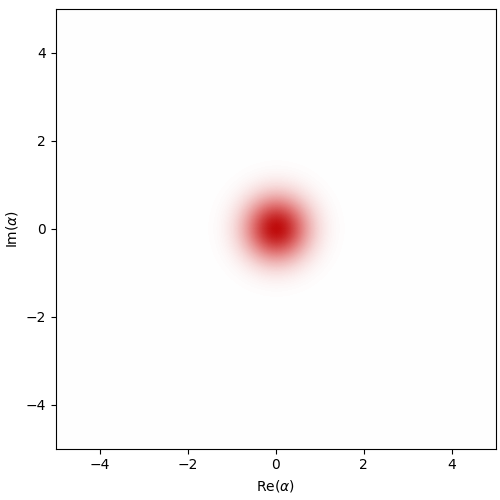

In [8]:
# initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state
t_save = jnp.linspace(0, T, 50)  # save times
res = dq.mesolve(H, [], psi0, t_save)


trace_a = dq.ptrace(res.states, 1) # trace of a

dq.plot.wigner_gif(trace_a)
# dq.plot.wigner_gif(res.states)

In [6]:
# Show the plot
plt.show()